In [1]:
import sys
sys.path.insert(0, './../Libs/')
import numpy as np
from BasisFunction import BaseBasicFunction
from SoftMarginSVM import PrimalSoftMarginSVM
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.utils import shuffle

def _shuffle(X, t):
    X, t = shuffle(X, t.ravel())
    t = t.reshape(-1, 1)
    return (X, t)

def __t_convert(tsamples):
    for i in tsamples:
        yield (i - 0.5)*2

In [2]:
sampleNoise = 0.2
seed = 0
Nsamples = 20
NsamplesEachClass = int(Nsamples/2)

centers = [
    [0, 0],
    [0.5, 0.5]
]

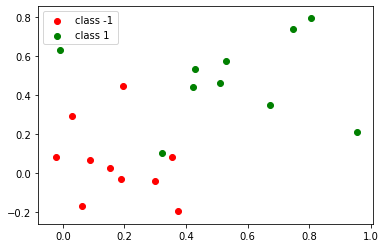

In [3]:
X, t = skdata.make_blobs(n_samples = [NsamplesEachClass, NsamplesEachClass], 
                         cluster_std = sampleNoise, random_state = seed, shuffle = False, centers = centers)

plt.scatter(X[:NsamplesEachClass, 0], X[:NsamplesEachClass, 1], c = 'r', label = "class -1")
plt.scatter(X[NsamplesEachClass:, 0], X[NsamplesEachClass:, 1], c = 'g', label = "class 1")
plt.legend()

done fitting, w = 
[[4.14148906]
 [6.36480976]]
b = -2.9705458898823274
xi = 
[[4.94960717e-08]
 [4.93470692e-08]
 [4.91826960e-08]
 [4.88603421e-08]
 [5.05668655e-08]
 [4.99328011e-08]
 [4.87215075e-08]
 [1.97422606e+00]
 [1.69271247e+00]
 [5.95211542e-08]
 [4.90385296e-08]
 [5.00482870e-08]
 [4.86830464e-08]
 [4.93920323e-08]
 [2.15132012e-07]
 [4.90010348e-08]
 [4.86456787e-08]
 [8.04652635e-07]
 [4.93874291e-08]
 [4.95549390e-08]]


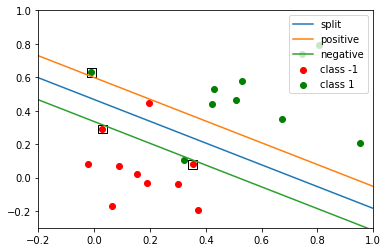

In [4]:
X, t = skdata.make_blobs(n_samples = [NsamplesEachClass, NsamplesEachClass], 
                         cluster_std = sampleNoise, random_state = seed, shuffle = False, centers = centers)

plt.scatter(X[:NsamplesEachClass, 0], X[:NsamplesEachClass, 1], c = 'r', label = "class -1")
plt.scatter(X[NsamplesEachClass:, 0], X[NsamplesEachClass:, 1], c = 'g', label = "class 1")

X, t = _shuffle(X, t)
t = np.array([i for i in __t_convert(t)]).reshape(-1, 1)
svm = PrimalSoftMarginSVM(X, t, 1000).fit()

w = svm.w.ravel()
a, b = w
c = svm.b
slope = -a/b
offset = -c/b

width = 1/np.sqrt(a*a + b*b)

w_xy = np.array([slope, offset]).reshape(-1, 1)
Xdraw = np.linspace(-0.2, 1.6, 100).reshape(-1, 1)
Xdraw_ = np.hstack((Xdraw, np.ones(100).reshape(-1, 1)))
ydraw = Xdraw_.dot(w_xy)

y_pos_draw = ydraw + width * np.ones(100).reshape(-1, 1)
y_neg_draw = ydraw - width * np.ones(100).reshape(-1, 1)

plt.plot(Xdraw, ydraw, label = "split")
plt.plot(Xdraw, y_pos_draw, label = "positive")
plt.plot(Xdraw, y_neg_draw, label = "negative")

sv_points = svm.supportVectorPoints()
Xmark = sv_points[:, 0].ravel()
ymark = sv_points[:, 1].ravel()

plt.scatter(Xmark, ymark, marker = 's', s=80, facecolors='none', edgecolors='k')

plt.xlim(-0.2, 1.0)
plt.ylim(-0.3, 1.0)
plt.legend()

fitting for 1e-05
done fitting, w = 
[[3.66104642e-05]
 [4.28313751e-05]]
b = -0.0004338167571792492
xi = 
[[1.00048536]
 [1.00047776]
 [1.00047876]
 [0.9996615 ]
 [1.00047491]
 [1.00047836]
 [0.99966126]
 [1.00045848]
 [0.99963618]
 [0.99964965]
 [1.00047771]
 [1.00047891]
 [0.99966085]
 [0.99966853]
 [0.99965402]
 [0.9996633 ]
 [0.99965855]
 [1.0004657 ]
 [0.99966162]
 [1.00050651]]
fitting for 0.0001
done fitting, w = 
[[0.00036617]
 [0.00042839]]
b = -0.0005837738213569121
xi = 
[[0.9999997 ]
 [1.00020465]
 [1.00014847]
 [0.99947857]
 [1.00024598]
 [1.00019231]
 [0.99948303]
 [1.00042346]
 [0.9996832 ]
 [0.99958466]
 [1.00020405]
 [1.00015059]
 [0.99948806]
 [0.9993722 ]
 [0.9995566 ]
 [0.99944972]
 [0.99951359]
 [1.00032194]
 [0.99947501]
 [0.9999552 ]]
fitting for 0.001
done fitting, w = 
[[0.00366172]
 [0.00428393]]
b = -0.0029638186647633373
xi = 
[[0.99706051]
 [0.99911843]
 [0.99855412]
 [0.9976029 ]
 [0.99953419]
 [0.99899439]
 [0.99764774]
 [1.00133865]
 [0.99967328]
 [0.99

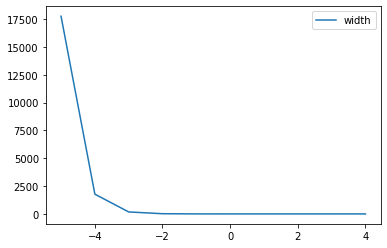

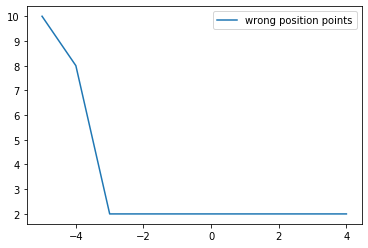

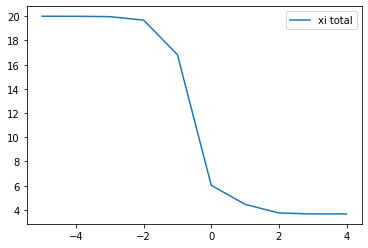

In [5]:
def plotIndividual(x, y, label):
    plt.figure()
    plt.plot(np.array(x), np.array(y), label = label)
    plt.legend()

rangeC = (-5, 5)
logCarr = [i for i in range(rangeC[0], rangeC[1])]
Carr = [10**i for i in range(rangeC[0], rangeC[1])]

widthArr = []
wrongPosArr = []
xiTotalArr = []

for C in Carr:
    print("fitting for {}".format(C))
    svm = PrimalSoftMarginSVM(X, t, C).fit()
    widthArr.append(svm.width())
    wrongPosArr.append(svm.wrongPositionPoints())
    xiTotalArr.append(svm.xiTotal())

plotIndividual(logCarr, widthArr, "width")
plotIndividual(logCarr, wrongPosArr, "wrong position points")
plotIndividual(logCarr, xiTotalArr, "xi total")